In [151]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [152]:
import pandas as pd
import datetime

In [153]:
target = '202012'

In [154]:
df = pd.read_table(f'data/parsed/{target}.tsv', index_col=0)
df

,date,time,mothermilk,milk,expressedmilk,small,big,sleep
0,2020-12-01,02:15:00,NaN,NaN,NaN,NaN,NaN,0.0
1,2020-12-01,02:20:00,NaN,NaN,NaN,1.0,NaN,NaN
2,2020-12-01,02:20:00,7.0,NaN,NaN,NaN,NaN,NaN
3,2020-12-01,02:30:00,NaN,NaN,NaN,NaN,NaN,1.0
4,2020-12-01,05:20:00,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
986,2020-12-31,19:20:00,6.0,NaN,NaN,NaN,NaN,NaN
987,2020-12-31,20:03:00,NaN,NaN,NaN,NaN,NaN,1.0
988,2020-12-31,20:03:00,42.0,NaN,NaN,NaN,NaN,NaN
989,2020-12-31,20:03:00,NaN,NaN,NaN,1.0,NaN,NaN


datetime indexをセット

In [155]:
df['datetime'] = pd.to_datetime(df['date'] + 'T' + df['time'])
df = df.set_index('datetime')
df

,date,time,mothermilk,milk,expressedmilk,small,big,sleep
datetime,,,,,,,,
2020-12-01 02:15:00,2020-12-01,02:15:00,NaN,NaN,NaN,NaN,NaN,0.0
2020-12-01 02:20:00,2020-12-01,02:20:00,NaN,NaN,NaN,1.0,NaN,NaN
2020-12-01 02:20:00,2020-12-01,02:20:00,7.0,NaN,NaN,NaN,NaN,NaN
2020-12-01 02:30:00,2020-12-01,02:30:00,NaN,NaN,NaN,NaN,NaN,1.0
2020-12-01 05:20:00,2020-12-01,05:20:00,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
2020-12-31 19:20:00,2020-12-31,19:20:00,6.0,NaN,NaN,NaN,NaN,NaN
2020-12-31 20:03:00,2020-12-31,20:03:00,NaN,NaN,NaN,NaN,NaN,1.0
2020-12-31 20:03:00,2020-12-31,20:03:00,42.0,NaN,NaN,NaN,NaN,NaN


睡眠時間 (分) をsleep_minutes列にセット

In [156]:
import numpy as np

sleep_series = pd.Series()
sleep_in_time = 0
df['sleep_minutes'] = np.nan

for index, row in df.iterrows():
    if row['sleep'] == 1:
        sleep_in_time = index
    if row['sleep'] == 0 and sleep_in_time is not 0:
        delta = index - sleep_in_time
        df.loc[sleep_in_time, 'sleep_minutes'] = delta.total_seconds() / 60

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [157]:
wake_series = pd.Series()
wake_up_time = 0
df['wake_minutes'] = np.nan

for index, row in df.iterrows():
    if row['sleep'] == 0:
        wake_up_time = index
    if row['sleep'] == 1 and wake_up_time is not 0:
        delta = index - wake_up_time
        df.loc[wake_up_time, 'wake_minutes'] = delta.total_seconds() / 60

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


5分間隔のデータに整理

In [158]:
df_5min = df.groupby(pd.Grouper(freq='5min')).sum()
df_5min['sleep_minutes'] = df['sleep_minutes'].groupby(pd.Grouper(freq='5min')).mean()  # 同じ値が同じ時刻のデータすべてに入ってしまっている
df_5min['wake_minutes'] = df['wake_minutes'].groupby(pd.Grouper(freq='5min')).mean()  # 同じ値が同じ時刻のデータすべてに入ってしまっている

1時間ごとに、その時間に入眠した場合にどれくらい(分)眠り続けたかの平均

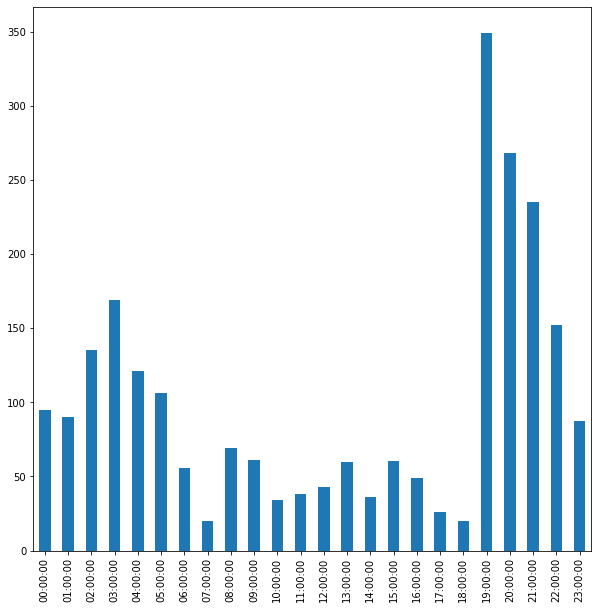

In [159]:
by_hour = df_5min.groupby(lambda x: datetime.time(hour=x.hour)).mean()
by_hour['sleep_minutes'].plot.bar(figsize=(10,10))

分布を確認

In [160]:
df_5min[df_5min['mothermilk'] > 0]['mothermilk'].describe()

count    212.000000
mean      16.212264
std       17.038491
min        2.000000
25%        8.000000
50%        9.500000
75%       13.000000
max       87.000000
Name: mothermilk, dtype: float64

In [161]:
df_5min[df_5min['milk'] > 0]['milk'].describe()

count     33.000000
mean     140.606061
std       33.348481
min       80.000000
25%      120.000000
50%      160.000000
75%      160.000000
max      160.000000
Name: milk, dtype: float64

In [162]:
df_5min[df_5min['expressedmilk'] > 0]['expressedmilk'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: expressedmilk, dtype: float64

In [163]:
df_5min[df_5min['sleep_minutes'] > 0]['sleep_minutes'].describe()

count    216.000000
mean     108.856481
std      135.736587
min        5.000000
25%       30.000000
50%       51.500000
75%      120.000000
max      642.000000
Name: sleep_minutes, dtype: float64

In [164]:
df_5min[df_5min['wake_minutes'] > 0]['wake_minutes'].describe()

count    219.000000
mean      94.771689
std       66.243247
min        4.000000
25%       30.000000
50%      100.000000
75%      140.000000
max      300.000000
Name: wake_minutes, dtype: float64

ある時刻より前の最後のイベントを取得する関数

In [165]:
def last_event_by(df, time, column):
    rows = df[:time][df[:time][column] > 0]
    if len(rows) == 0:
        return 0, 0, 0
    row = rows.iloc[-1]
    delta = time - row.name
    return row.name, row[column], delta.total_seconds() / 60

last_event_by(df_5min, pd.to_datetime('2020-10-02 03:00'), 'mothermilk')

(0, 0, 0)

睡眠時間と、その直前の各種イベントの内容をデータセット化

In [166]:
sleep_df = pd.DataFrame(columns=['datetime', 'hour', 'sleep_minutes', 'last_mothermilk', 'last_mothermilk_before', 'last_milk', 'last_milk_before', 'last_small_before', 'last_big_before', 'last_wake_minutes'])

for index, row in df_5min.iterrows():
    if row['sleep_minutes'] > 0:
        mothermilk_time, mothermilk, mothermilk_before = last_event_by(df_5min, index, 'mothermilk')
        milk_time, milk, milk_before = last_event_by(df_5min, index, 'milk')
        small_time, small, small_before = last_event_by(df_5min, index, 'small')
        big_time, big, big_before = last_event_by(df_5min, index, 'big')
        wake_time, wake, wake_before = last_event_by(df_5min, index, 'wake_minutes')
        sleep_df = sleep_df.append({
            'datetime': index,
            'hour': index.hour,
            'sleep_minutes': row['sleep_minutes'],
            'last_mothermilk': mothermilk,
            'last_mothermilk_before': mothermilk_before,
            'last_milk': milk,
            'last_milk_before': milk_before,
            'last_small_before': small_before,
            'last_big_before': big_before,
            'last_wake_minutes': wake
        }, ignore_index=True)

sleep_df

,datetime,hour,sleep_minutes,last_mothermilk,last_mothermilk_before,last_milk,last_milk_before,last_small_before,last_big_before,last_wake_minutes
0,2020-12-01 02:30:00,2,170.0,7.0,10.0,0,0,10.0,0,15.0
1,2020-12-01 06:00:00,6,60.0,17.0,30.0,0,0,30.0,30,40.0
2,2020-12-01 09:25:00,9,5.0,7.0,85.0,0,0,130.0,130,145.0
3,2020-12-01 09:35:00,9,50.0,7.0,95.0,0,0,140.0,140,5.0
4,2020-12-01 11:45:00,11,10.0,7.0,225.0,0,0,55.0,55,80.0
...,...,...,...,...,...,...,...,...,...,...
211,2020-12-30 19:40:00,19,618.0,49.0,0.0,160,40,0.0,0,137.0
212,2020-12-31 08:10:00,8,50.0,10.0,70.0,160,790,10.0,750,130.0
213,2020-12-31 11:50:00,11,20.0,8.0,120.0,160,1010,20.0,970,170.0
214,2020-12-31 14:05:00,14,70.0,8.0,70.0,160,1145,155.0,1105,115.0


In [167]:
sleep_df.to_csv(f'data/preprocessed/sleep_{target}.tsv', sep='\t')

In [168]:
sleep_daytime_df = sleep_df[sleep_df['hour'].map(lambda hour: hour >= 6 and hour <= 18)]
sleep_daytime_df

,datetime,hour,sleep_minutes,last_mothermilk,last_mothermilk_before,last_milk,last_milk_before,last_small_before,last_big_before,last_wake_minutes
1,2020-12-01 06:00:00,6,60.0,17.0,30.0,0,0,30.0,30,40.0
2,2020-12-01 09:25:00,9,5.0,7.0,85.0,0,0,130.0,130,145.0
3,2020-12-01 09:35:00,9,50.0,7.0,95.0,0,0,140.0,140,5.0
4,2020-12-01 11:45:00,11,10.0,7.0,225.0,0,0,55.0,55,80.0
5,2020-12-01 13:55:00,13,85.0,12.0,100.0,0,0,60.0,185,120.0
...,...,...,...,...,...,...,...,...,...,...
210,2020-12-30 16:45:00,16,40.0,10.0,65.0,160,1305,15.0,15,85.0
212,2020-12-31 08:10:00,8,50.0,10.0,70.0,160,790,10.0,750,130.0
213,2020-12-31 11:50:00,11,20.0,8.0,120.0,160,1010,20.0,970,170.0
214,2020-12-31 14:05:00,14,70.0,8.0,70.0,160,1145,155.0,1105,115.0


In [169]:
sleep_daytime_df.to_csv(f'data/preprocessed/sleep_daytime_{target}.tsv', sep='\t')